# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [48]:
# your answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [49]:
# your answer here
employee= pd.read_csv("data/Employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [50]:
# Method 1
# your answer here
employee.groupby(["Department"]).agg({"Salary":"mean"})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [51]:
# Method 2
# your answer here
employee.pivot_table(values='Salary',columns='Department',aggfunc='mean')


Department,HR,IT,Sales
Salary,45.0,48.75,55.0


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [52]:
# your answer here
employee.pivot_table(values='Salary',index=['Department'],columns='Title',aggfunc='mean')

Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [53]:
# your answer here
employee.pivot_table(values=['Salary'],index=['Department'],columns=['Title','Years'],aggfunc={'Salary':'mean',
                                                                                                'Years':'mean'})

Salary                                           Years          \
Title          VP analyst             associate                VP analyst   
Years           8       1     2     4         2     3     7     8       1   
Department                                                                  
HR           70.0     NaN  30.0  35.0       NaN   NaN   NaN   8.0     NaN   
IT           70.0    35.0  30.0   NaN       NaN   NaN  60.0   8.0     1.0   
Sales         NaN     NaN   NaN   NaN      55.0  55.0   NaN   NaN     NaN   

                                          
Title                associate            
Years         2    4         2    3    7  
Department                                
HR          2.0  4.0       NaN  NaN  NaN  
IT          2.0  NaN       NaN  NaN  7.0  
Sales       NaN  NaN       2.0  3.0  NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [54]:
# your answer here
employee.pivot_table(values=['Salary','Name'],index=['Department','Title'],aggfunc={'Salary':'mean',
                                                                                    'Name':'count'})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [55]:
# your answer here
employee.pivot_table(values=['Salary','Name'],index=['Department','Title'],aggfunc={'Salary':['median','max','min','std'],
                                                                                    'Name':'count'})
#There is 3 null values,Because there is only one person per Title so it cant derive

Name Salary                     
                     count    max median min       std
Department Title                                      
HR         VP            1     70   70.0  70       NaN
           analyst       2     35   32.5  30  3.535534
IT         VP            1     70   70.0  70       NaN
           analyst       2     35   32.5  30  3.535534
           associate     1     60   60.0  60       NaN
Sales      associate     2     55   55.0  55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [56]:
# your answer here
employee.pivot_table(values=['Salary','Name'],index=['Department','Title'],fill_value=0,aggfunc={'Salary':['median','max','min','std'],
                                                                                    'Name':'count'}).round(3)


Name Salary                  
                     count    max median min    std
Department Title                                   
HR         VP            1     70   70.0  70  0.000
           analyst       2     35   32.5  30  3.536
IT         VP            1     70   70.0  70  0.000
           analyst       2     35   32.5  30  3.536
           associate     1     60   60.0  60  0.000
Sales      associate     2     55   55.0  55  0.000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [57]:
# your answer here
employee.pivot_table(values=['Salary','Name'],index=['Department'],aggfunc={'Salary':'sum',
                                                                                    'Name':'count'})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [58]:
# your answer here
employee.pivot_table(values=['Salary','Name','Years'],index=['Department','Title'],aggfunc={'Salary':'mean',
                                                                                    'Name':'count',
                                                                                    'Years':'sum'})

Name  Salary  Years
Department Title                         
HR         VP            1    70.0      8
           analyst       2    32.5      6
IT         VP            1    70.0      8
           analyst       2    32.5      3
           associate     1    60.0      7
Sales      associate     2    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [59]:
def mean_after_removing_max(x):
    total_sum = sum(x)
    max_salary = max(x) 
    count = len(x) - 1
    return (total_sum - max_salary) / count

In [60]:
employee.pivot_table(
    index='Department',
    values='Salary',
    aggfunc=mean_after_removing_max
).reset_index()

,Department,Salary
0,HR,32.500000
1,IT,41.666667
2,Sales,55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [61]:
# your answer here
fitbit=pd.read_csv('data/Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [62]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [63]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [64]:
# your answer here
fitbit[['Steps','Minutes Very Active']].corr()

,Steps,Minutes Very Active
Steps,1.000000,0.571452
Minutes Very Active,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

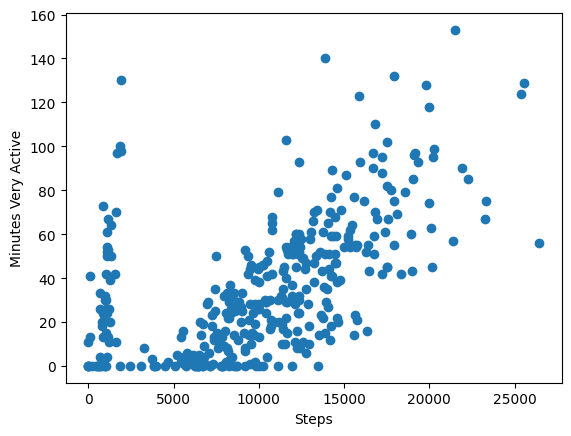

In [65]:
# your answer here
plt.scatter(x=fitbit['Steps'],y=fitbit['Minutes Very Active'])
plt.xlabel('Steps')
plt.ylabel('Minutes Very Active')
plt.show()


#### What can you say about Minute Very Active and Steps? Write a comment below

In [66]:
# your answer here
'''They have a correlaction that shows that people which has mores steps are generaly the ones who are active for more time, and the most active people
usually do more than 10k steps '''


'They have a correlaction that shows that people which has mores steps are generaly the ones who are active for more time, and the most active people\nusually do more than 10k steps '

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [67]:
# your answer here
fitbit[['Steps','Minutes Sedentary']].corr()

,Steps,Minutes Sedentary
Steps,1.000000,0.076906
Minutes Sedentary,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

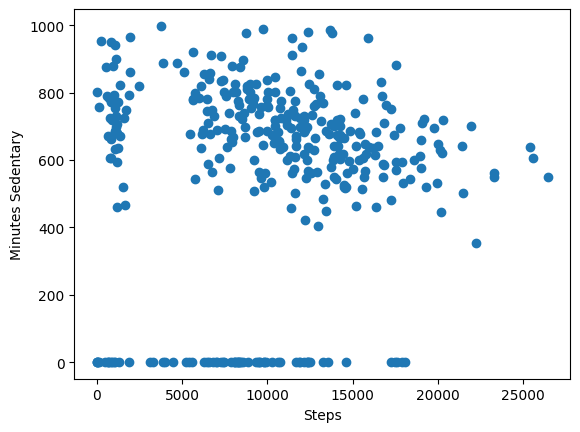

'The people who do less than 10k steps tends to be be more sendentary,this statement based on the plot,using only the correlation wont\ngive us a nice view'

In [68]:
# your answer here
plt.scatter(x=fitbit['Steps'],y=fitbit['Minutes Sedentary'])
plt.xlabel('Steps')
plt.ylabel('Minutes Sedentary')
plt.show()
'''The people who do less than 10k steps tends to be be more sendentary,this statement based on the plot,using only the correlation wont
give us a nice view'''

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [69]:
# your answer here
fitbit[['Steps','MinutesOfSleep']].corr()

,Steps,MinutesOfSleep
Steps,1.000000,0.130986
MinutesOfSleep,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

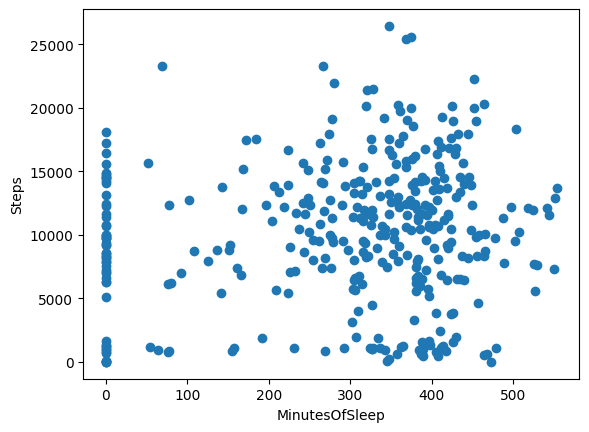

'They dont see to have a strong relation between them '

In [70]:
# your answer here
plt.scatter(y=fitbit['Steps'],x=fitbit['MinutesOfSleep'])
plt.ylabel('Steps')
plt.xlabel('MinutesOfSleep')
plt.show()
'''They dont see to have a strong relation between them '''

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [71]:
# your answer here
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()
cor_fit.sort_values('Steps',ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [72]:
# your answer here
'''Minutes Very Active and floors'''

'Minutes Very Active and floors'

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [73]:
# your answer here
time_grades= pd.read_csv('data/Time_Grades.csv')
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

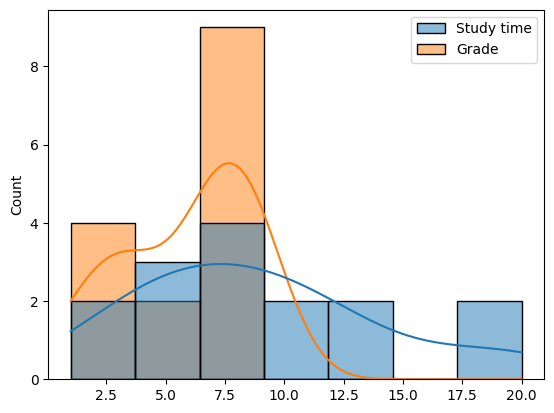

In [82]:
# your answer here
sns.histplot(time_grades,kde=True)
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [84]:
# your answer here
from scipy import stats
print("Pearson correlation:", stats.pearsonr(time_grades["Grade"], time_grades["Study time"])[0])
print("Spearman correlation:", stats.spearmanr(time_grades["Grade"], time_grades["Study time"])[0])
'''Both correlations shows there a connection between the Grade and the Study time, as the Pearson is more linear based it is not so precise in this example,
as there are other factors than on Study time that can influence'''

Pearson correlation: 0.7980456073578858
Spearman correlation: 0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

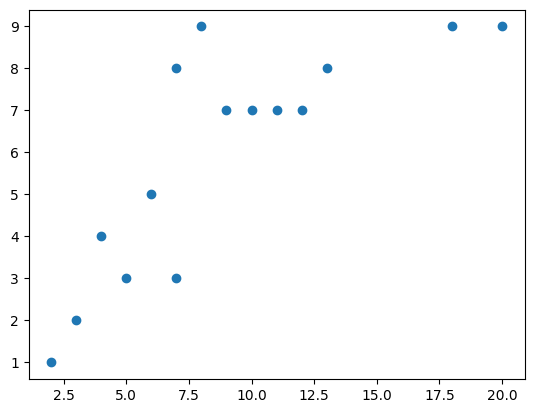

In [93]:
# your answer here
plt.scatter(y=time_grades["Grade"],x=time_grades["Study time"])
plt.show()
'The students that had more study time tends to have the higher grades'

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [1]:
# your answer here
'''Pearson is the best alternative when there are linear values and constant pearson is the best shot, when the values wont follow a constant and linear
path the Spearman is the way to go'''

'Pearson is the best alternative when there are linear values and constant pearson is the best shot, when the values wont follow a constant and linear\npath the Spearman is the way to go'